<h1 align=center><font size = 6>Credit Card Fraud Detection using Decision Trees</font></h1>

I am one of the thousands of users who have ever received a call from their credit card company to inform them of a fraudulent use of it. Fortunately, in my case it was only a false positive.

If you've ever wondered how credit card companies can detect fraudulent use, the answer lies in machine learning techniques. There are different ways to implement an effective model for its detection, one of them being the Decision Trees, which we will implement in this notebook to create an example.

From a data set that contains a history of credit card operations, we will define a model and analyze its performance for new detections.

__IMPORTANT NOTE__: This notebook was made by __Alejandro Velázquez Portas__ (<a href="https://www.linkedin.com/in/alexvelazquezp/">LinkedIn profile</a>). Take this into account when reproducing or citing its content.

# 1. Data import

We import everything necessary to execute the project:

In [120]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics
import itertools
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from six import StringIO
import pydotplus
import warnings

Let's start reading the csv file that contains all the necessary information

In [121]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# 2. Data analysis

Our dataset contains a good number of columns, their meaning being unknown in most cases (they are referenced as V1 to V28), along with a column called 'Amount' that corresponds to the amount of the operation, and another called 'Class' that indicates a 1 in the case of a fraudulent operation.

In [122]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

It is mandatory that the 'Class' column contains the classification with an integer, so let's check it:

In [123]:
df[['Class']].dtypes

Class    int64
dtype: object

Correct.

We will now proceed to carry out a first exploration of the data using the _describe()_ method

In [124]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.165980e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.373150e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.086869e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.490107e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.177556e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406455e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


From the previous table we can conclude that our dataset contains a total of 284807 records.

The values of the _Vx_ columns present a great disparity of values, in the range of hundreds from negative to positive values. The same applies to the 'Amount' column, where there are transactions of tens of thousands.

The fact that there are columns whose difference between the maximum and minimum is less than 10, and others that exceed hundreds and even thousands, leads us to conclude that later a preprocessing will be necessary so that they do not have an impact on the result. If we wanted to delve into these differences, we could easily examine them in a table like the following:

In [125]:
df_analysis = df.describe().T
df_analysis = df_analysis[['min', 'max']]
df_analysis = df_analysis.assign(diff=pd.Series(df_analysis['max']-df_analysis['min']))
df_analysis

,min,max,diff
Time,0.000000,172792.000000,172792.000000
V1,-56.407510,2.454930,58.862440
V2,-72.715728,22.057729,94.773457
V3,-48.325589,9.382558,57.708148
V4,-5.683171,16.875344,22.558515
V5,-113.743307,34.801666,148.544973
V6,-26.160506,73.301626,99.462131
V7,-43.557242,120.589494,164.146736
V8,-73.216718,20.007208,93.223927
V9,-13.434066,15.594995,29.029061


Let's examine the column _'Class'_ in more detail. In a graph, we compare the values 1 and 0 of the fraudulent operations:

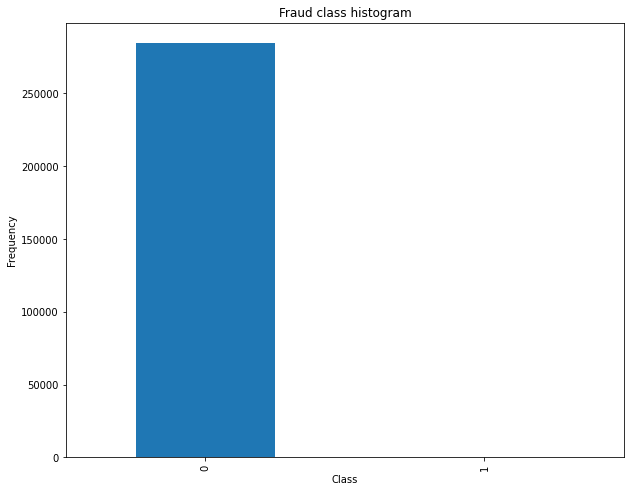

In [126]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes.plot(kind = 'bar', figsize=(10,8))
plt.title("Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

The difference is so big between the values 0 and 1, that the scale of the graph does not allow to appreciate it. We will  calculate manually the percentage of fraudulent operations:

In [127]:
print("From a total of {} operations, there are {} marked as fraud ({:.2f}%)".format(sum(count_classes),
                                                                                     min(count_classes),
                                                                                     (min(count_classes)/sum(count_classes))*100
                                                                                    ))

From a total of 284807 operations, there are 492 marked as fraud (0.17%)


The number is low, but how much are these operations? They exceed 60,000 USD, but contrary to what one would expect, they are usually small amount operations.

The total amount of the 492 fraud operations is 60127.97 USD


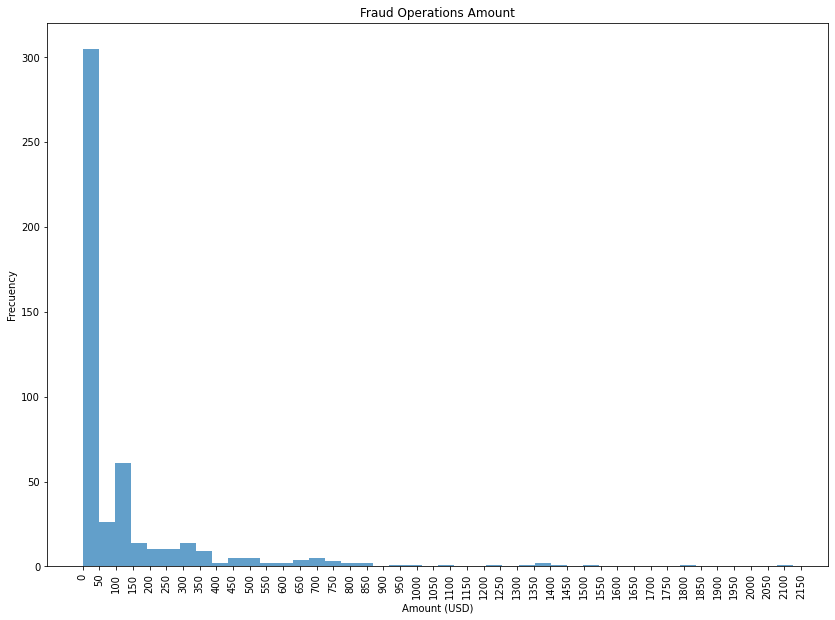

In [128]:
#Calculate the fraud amount
total_fraud = df['Amount'][df['Class'] == 1]
print("The total amount of the {} fraud operations is {} USD".format(min(count_classes), total_fraud.sum()))

# Define x-axis, in 50 USD steps
segments = int(total_fraud.max() // 50) + 1
bin_edges = []
for i in range(segments+1):
    bin_edges.append(50*i)

#Plots the histogram
total_fraud.plot(kind='hist', 
                 figsize=(14,10), 
                 bins=len(bin_edges), 
                 xticks=bin_edges,
                 alpha=0.7,
                 rot=90
                )
plt.title('Fraud Operations Amount')
plt.xlabel('Amount (USD)')
plt.ylabel('Frecuency')
plt.show()

Do you want a surprise? If we examine the operations of less than 20 USD, we see that most of the fraud is concentrated in amounts of approximately one dollar.

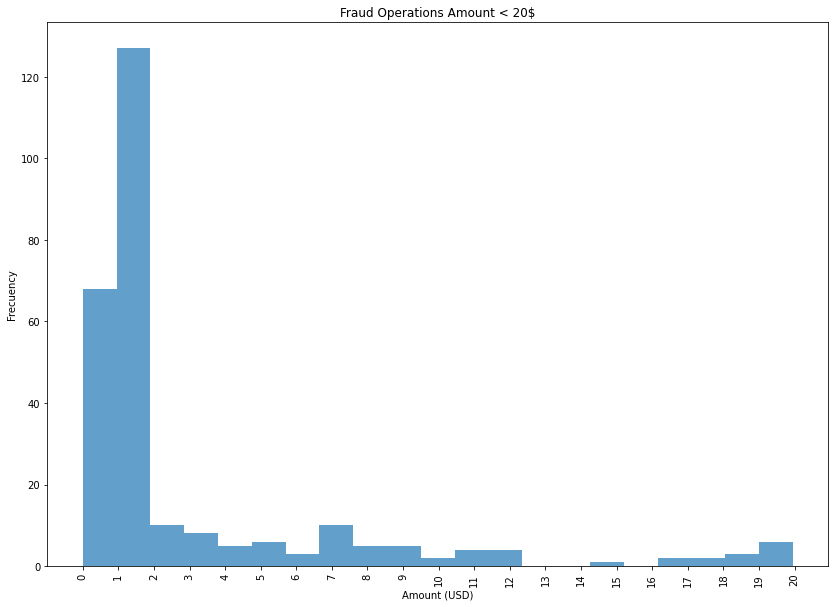

In [129]:
total_fraud50 = total_fraud[total_fraud < 20]

# Define x-axis, in 1 USD steps
segments = int(total_fraud50.max()) + 1
bin_edges = []
for i in range(segments+1):
    bin_edges.append(i)

#Plots the histogram
total_fraud50.plot(kind='hist', 
                 figsize=(14,10), 
                 bins=len(bin_edges), 
                 xticks=bin_edges,
                 alpha=0.7,
                 rot=90
                )
plt.title('Fraud Operations Amount < 20$')
plt.xlabel('Amount (USD)')
plt.ylabel('Frecuency')
plt.show()

Finished the data exploratory task, we will start working in our model. The first step is create 2 datasets, one for the input variables (x) and other for the ouput (y)

In [130]:
df_y = df[['Class']]
df_x = df.copy()
del df_x['Class']
del df_x['Time']
x = np.asarray(df_x)
y = np.asarray(df_y)

Continuing with the need previously detected, we will preprocess the input data:

In [131]:
x = preprocessing.StandardScaler().fit(x).transform(x)
x[0]

array([-0.69, -0.04,  1.67,  0.97, -0.25,  0.35,  0.19,  0.08,  0.33,
        0.08, -0.54, -0.62, -1.  , -0.32,  1.6 , -0.54,  0.24,  0.03,
        0.5 ,  0.33, -0.02,  0.38, -0.18,  0.11,  0.25, -0.39,  0.33,
       -0.06,  0.24])

And finally we will divide the data into training and test sets. In this case, we will use a ratio of 80% for training and 20% for testing.

In [132]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

# 3. Model development

We are now in a position to create our Decision Trees model, in addition to calculating our own output estimate from the x test data.

We will use entropy as criteria, and we will not limit the depth of our tree in order to obtain a better performance.

In [133]:
dtrees = DecisionTreeClassifier(criterion="entropy")
dtrees.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy')

And that's all. We already have our operating model. But how does it work? How effective is it?

We can start by calculating the accuracy of our model. Using the test data, it will be given by the number of correct predictions divided by the total number of data.

In [134]:
yhat = dtrees.predict(x_test)
acc = metrics.accuracy_score(y_test, yhat)
print("Our model accuracy: {:.2f}%".format(acc*100))

Our model accuracy: 99.93%


The accuracy obtained is really great.

We can also check how our model works using the confusion matrix. This will show us an output like the following:

<img src="https://static.packt-cdn.com/products/9781838555078/graphics/C13314_06_05.jpg" alt="Confusion matrix" width="445" height="230"> 

The more values we have in the orange boxes, the better the model will perform. This will mean that where we predict 1, the real value will be 1, and where we predict 0, the real value is also zero. On the other hand, in the yellow boxes we will have false positives (predicted = 1, but real = 0) and false negatives (predicted = 0, but real = 1).

Let's calculate our confusion matrix:

In [135]:
c_matrix = confusion_matrix(y_test, yhat)
print(c_matrix)

[[56861    17]
 [   21    63]]


As we expected, the performance of the model is great and this is reflected in the confusion matrix. We have 17 false positives and 21 false negatives out of a total of 56962 samples.

Let's use a more visual graph to visualize the confusion matrix.

In [136]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

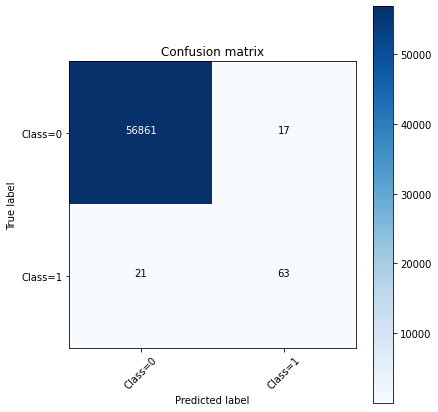

In [137]:
np.set_printoptions(precision=2)
plt.figure(figsize=(6,6))
plot_confusion_matrix(c_matrix, classes=['Class=0','Class=1'],normalize= False,  title='Confusion matrix')

We can also print the classification report to check our model performance:

In [138]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56878
           1       0.79      0.75      0.77        84

    accuracy                           1.00     56962
   macro avg       0.89      0.87      0.88     56962
weighted avg       1.00      1.00      1.00     56962



Finally we can calculate the ROC curve, also finding the AUC (Area Under Curve). Let us remember, although there is no established criterion, the classification by Hosmer & Lemeshow (2013):

<ul>
    <li>0.5 = This suggests no discrimination, so we might as well flip a coin</li>
    <li>0.5-0.7 = We consider this poor discrimination, not much better than a coin toss</li>
    <li>0.7-0.8 = Acceptable discrimination</li>
    <li>0.8-0.9= Excellent discrimination</li>
    <li>>0.9 = Outstanding discrimination</li>
</ul>

With an AUC of 0.87, we can conclude that our model as excelent.

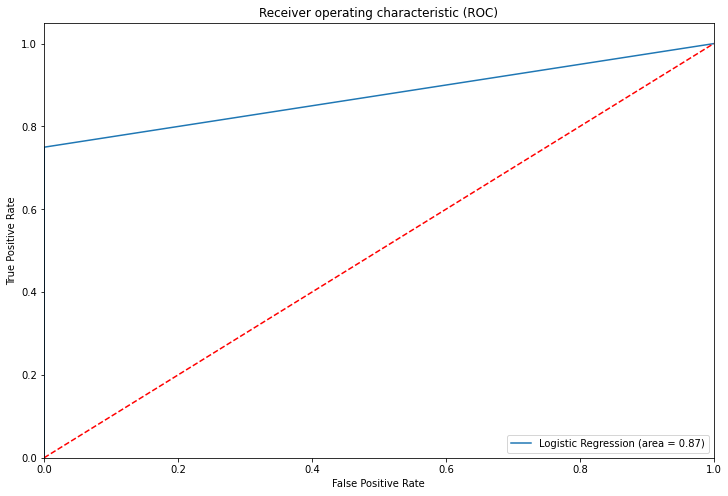

In [139]:
logit_roc_auc = roc_auc_score(y_test, yhat)
fpr, tpr, thresholds = roc_curve(y_test, yhat)
plt.figure(figsize=(12,8))
plt.plot(fpr, tpr, label='Decision Trees (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Finally, we can draw our tree and the criteria followed, in order to be able to carry out a more visual examination and that its operation can be interpreted. We must bear in mind that, due to the number of input parameters, the complexity of the tree will be very high.

In [140]:
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    y_train = np.where(y_train==0, 'No fraud', y_train)
    y_train = np.where(y_train=='1', 'Fraud', y_train)

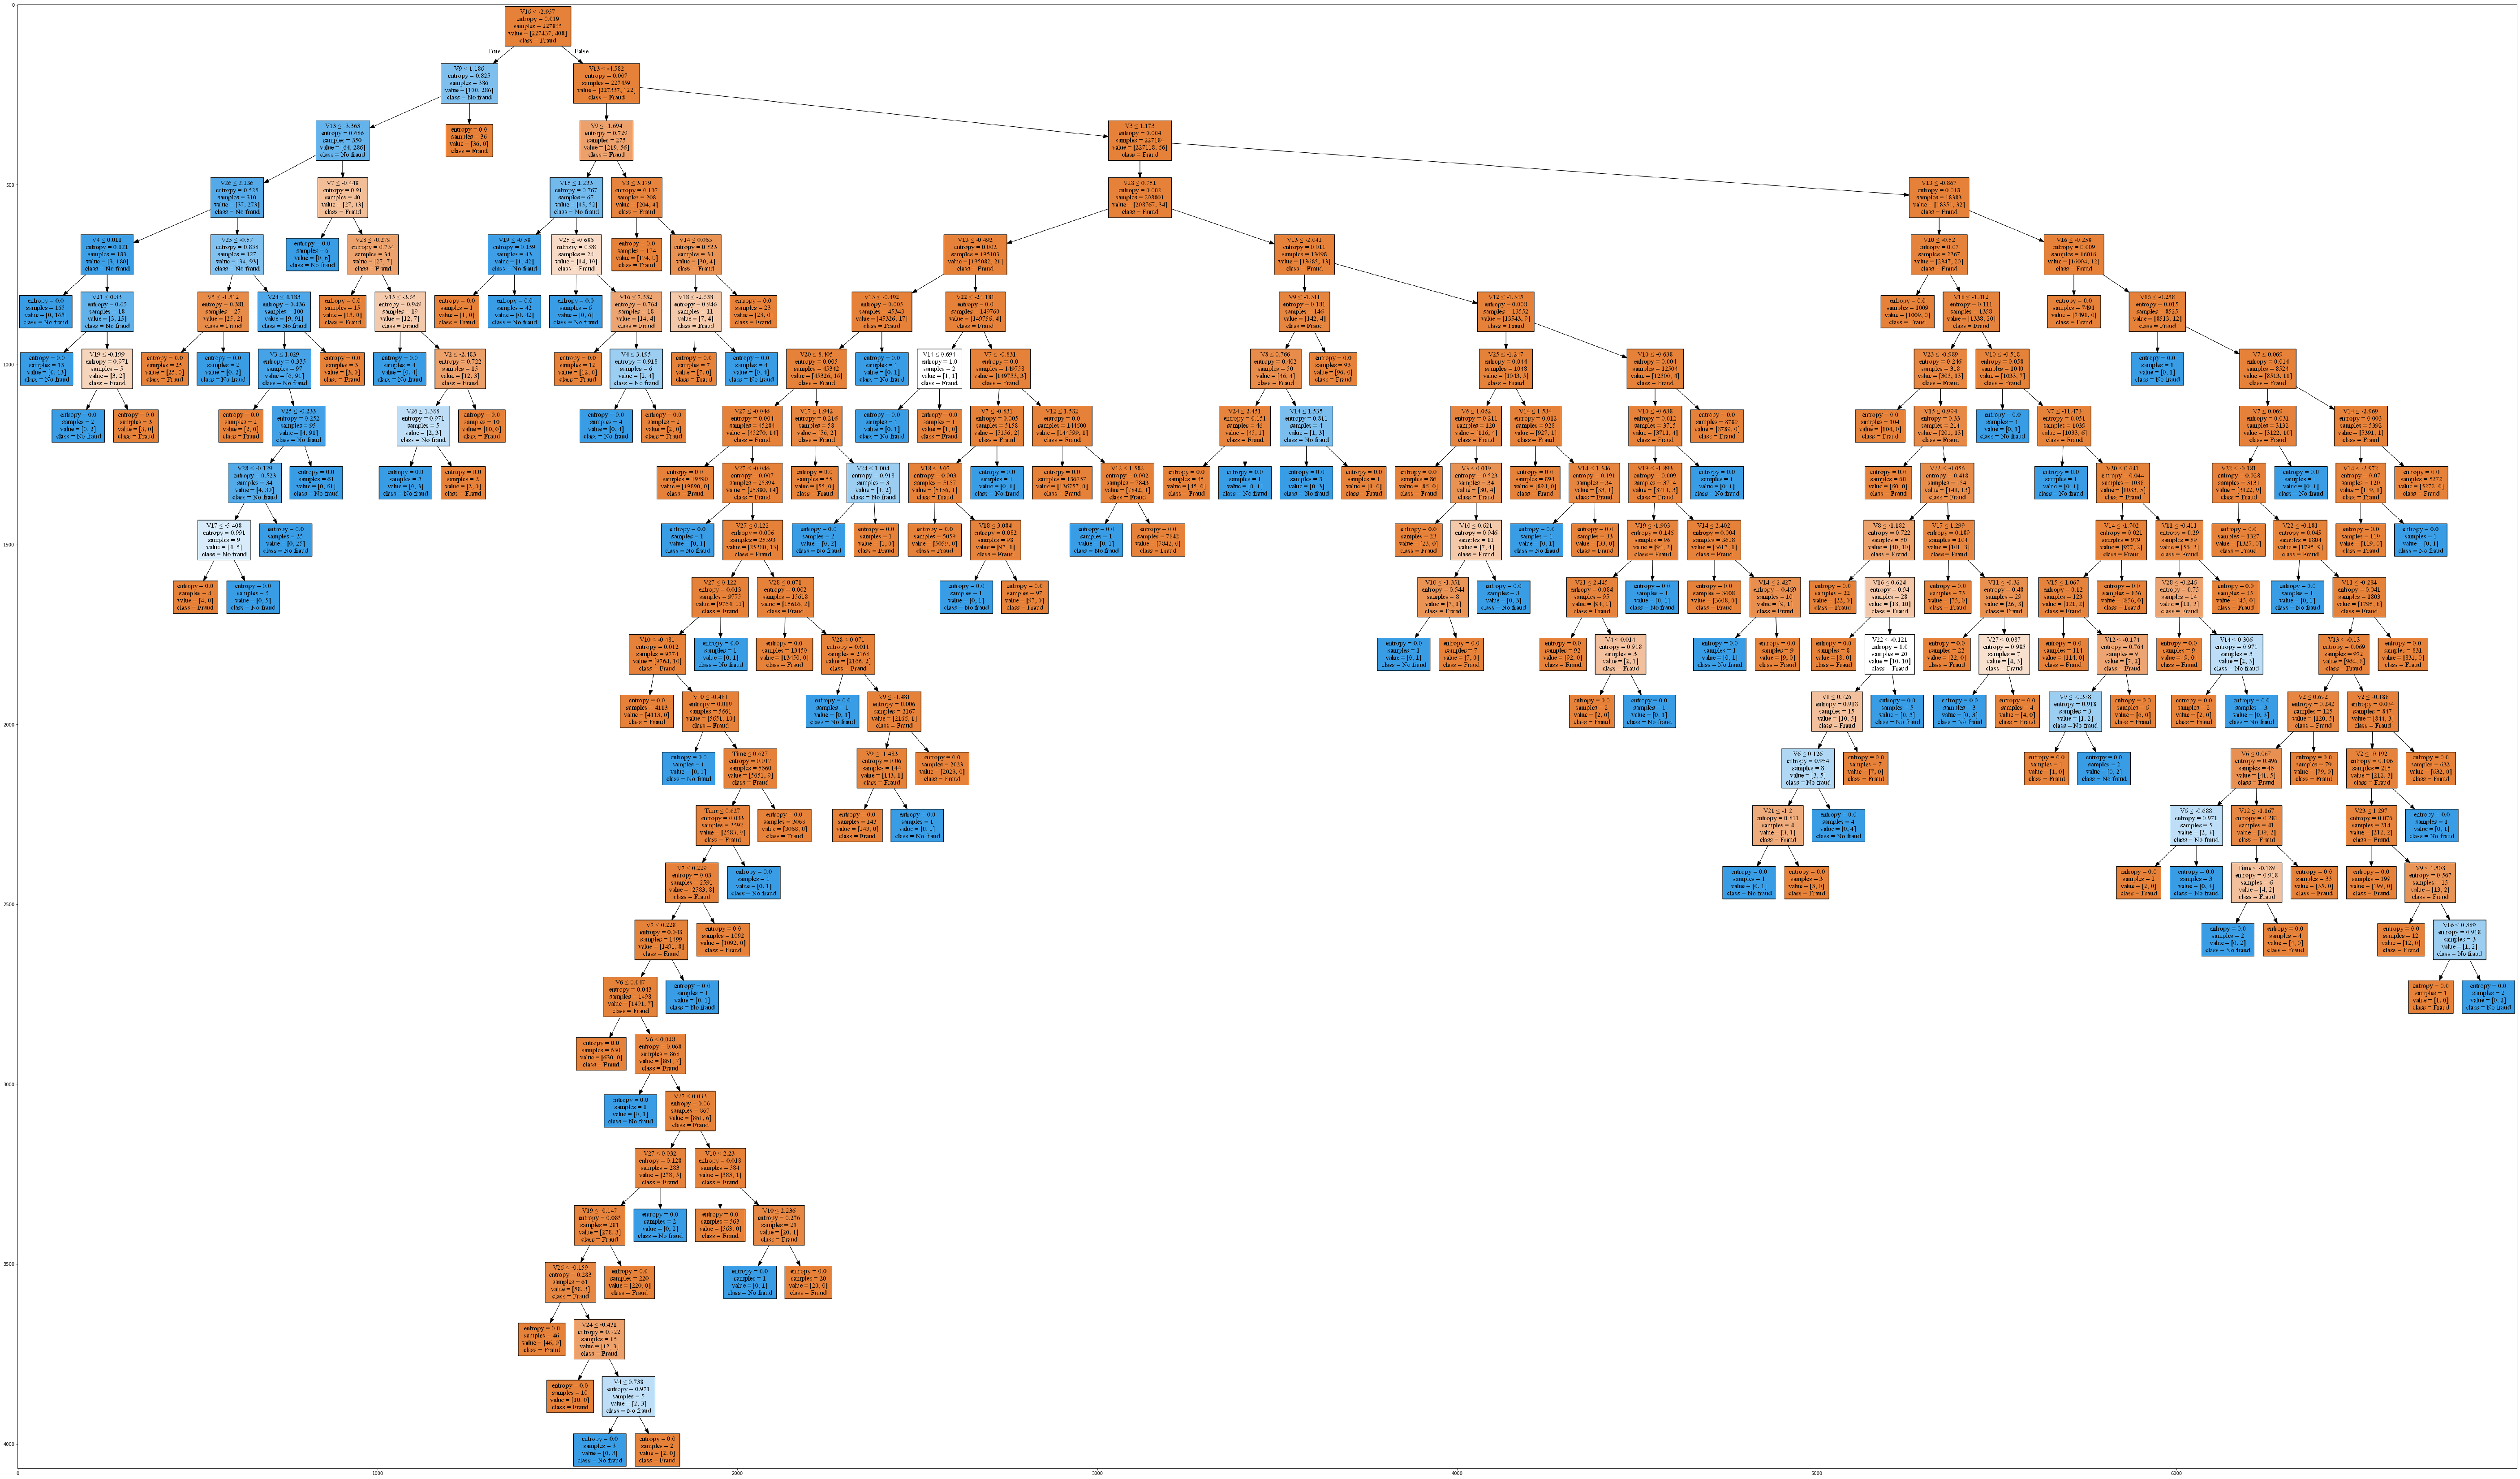

In [141]:
dot_data = StringIO()
filename = "ccfraud.png"
featureNames = df.columns[0:29]
targetNames = df["Class"].unique().tolist()
out=tree.export_graphviz(dtrees,feature_names=featureNames, out_file=dot_data,  filled=True, class_names= np.unique(y_train), special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')
plt.show()

# 4. Conclusions

Through a simple use of Decision Trees we have managed to build an effective model for credit card fraud detection, with a high accuracy of 99.93% and an AUC of 0.87 that could be classified as excellent.

The performance of the model is excellent in terms of processing speed, and without being the classification method that has obtained the best results for this dataset, the values ​​are very close to their alternatives